In [6]:
import numpy as np
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms

In [7]:
import matplotlib
print(f'numpy       {np.__version__}')             # 1.18.1
print(f'matplotlib  {matplotlib.__version__}')     # was 2.1.0   :  upgraded to 3.2.0
if matplotlib.__version__ == '2.1.0' :
    print("!!! Upgrading matplotlib -- newer version required")
    import os
    os.system("pip install 'matplotlib==3.2'")
    print("!!! Restart Kernel !!!")
# ! pip install matplotlib          # left the version at 2.1.0 as 'Requirement already satisfied'
# ! pip install 'matplotlib>=2.2'   # left the version at 2.1.0 as 'Requirement already satisfied'
# ! pip install "matplotlib==2.2"   # worked
# ! pip install "matplotlib==3.2"   # worked, also installed kiwisolver-1.1.0
# AFTER FIRST INSTALLED, must restart kernel in order to load new version.

numpy       1.12.1
matplotlib  3.2.0


In [8]:
class CubeRootScale(mscale.ScaleBase):
    """
    The scale function:
      y ** (1/3)

    The inverse scale function:
      y ** 3
    """

    # The scale class must have a member ``name`` that defines the string used
    # to select the scale.  For example, ``gca().set_yscale("cuberoot")`` would
    # be used to select this scale.
    name = 'cuberoot'

    def __init__(self, axis, **kwargs):
        """
        Any keyword arguments passed to ``set_xscale`` and ``set_yscale`` will
        be passed along to the scale's constructor.
        """
        super().__init__(axis)

    def get_transform(self):
        """
        Override this method to return a new instance that does the
        actual transformation of the data.

        The CubeRootTransform class is defined below as a
        nested class of this one.
        """
        return self.CubeRootTransform()

    def set_default_locators_and_formatters(self, axis):
        """
        Override to set up the locators and formatters to use with the
        scale.  This is only required if the scale requires custom
        locators and formatters.  Writing custom locators and
        formatters is rather outside the scope of this example, but
        there are many helpful examples in ``ticker.py``.
        
        Or see the MercatorLatitudeScale example on the web.
        """
        pass

    def limit_range_for_scale(self, vmin, vmax, minpos):
        """
        Override to limit the bounds of the axis to the domain of the
        transform.  In the case of Mercator, the bounds should be
        limited to the threshold that was passed in.  Unlike the
        autoscaling provided by the tick locators, this range limiting
        will always be adhered to, whether the axis range is set
        manually, determined automatically or changed through panning
        and zooming.
        """
        return vmin, vmax

    class CubeRootTransform(mtransforms.Transform):
        # There are two value members that must be defined.
        # ``input_dims`` and ``output_dims`` specify number of input
        # dimensions and output dimensions to the transformation.
        # These are used by the transformation framework to do some
        # error checking and prevent incompatible transformations from
        # being connected together.  When defining transforms for a
        # scale, which are, by definition, separable and have only one
        # dimension, these members should always be set to 1.
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self):
            mtransforms.Transform.__init__(self)

        def transform_non_affine(self, a):
            """
            This transform takes an Nx1 ``numpy`` array and returns a
            transformed copy. Importantly, the ``transform`` method *must*
            return an array that is the same shape as the input array, since
            these values need to remain synchronized with values in the
            other dimension.
            """
            return np.cbrt(a)

        def inverted(self):
            """
            Override this method so matplotlib knows how to get the
            inverse transform for this transform.
            """
            return CubeRootScale.CubeTransform()

    class CubeTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self):
            mtransforms.Transform.__init__(self)

        def transform_non_affine(self, a):
            return a ** 3

        def inverted(self):
            return CubeRootScale.CubeRootTransform()

# Now that the Scale class has been defined, it must be registered so
# that ``matplotlib`` can find it.
mscale.register_scale(CubeRootScale)

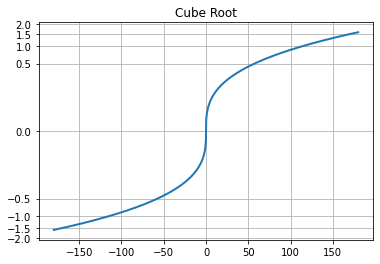

In [9]:
if True : # __name__ == '__main__':
    import matplotlib.pyplot as plt

    t = np.arange(-180.0, 180.0, 0.1)
    s = np.radians(t)/2.

    plt.plot(t, s, '-', lw=2)
    plt.gca().set_yscale('cuberoot')

    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.title('Cube Root')
    plt.grid(True)
    plt.show()
    # Stangely, sometimes only prints:  <Figure size 640x480 with 1 Axes>